# Reinforcement Learning
# Project 1 - *Building Reinforcement Learning Environment*
### Name: Yash Nitin Mantri
### UB Number: 50313926


## Environment Explanation

We have selected a 4x4 grid environment.

### States:

The initial state is at position (0,0) -> Represented by S

The final state is at position (3,3) -> Represented by *

The dead state is at position (1,3) -> Represented by X

The unreachable state (illegal) is at position (1,1) -> Represented by -


#### *State set*:

S = {

      (0,0), (0,1), (0,2), (0,3),

      (1,0), (1,1), (1,2), (1,3),

      (2,0), (2,1), (2,2), (2,3),

      (3,0), (3,1), (3,2), (3,3)
    }


### Actions:

The agent can either go up, down, left or right

#### *Action set*:

A = { "up", "down", "left", "right"}


### Rewards:

The reward for reaching final state is +1

The reward for reaching dead state is -1

The reward for every other action is -0.5

#### *Reward set*:

R = { "+1", "-1", "-0.5"}

# Part 1 - Build a deterministic environment

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# global variables
number_of_rows = 4
number_of_columns = 4
goal_state = (3, 3)
dead_state = (1, 3)
initial_state = (0, 0)
unreachable_state = (1,1)
total_reward = 0
round_reward = 0
deterministic_env = False

In [0]:
# Environment Functions
class State:
  # Initialize the environment
  def __init__(self, state=initial_state):
    self.grid = np.zeros([number_of_rows, number_of_columns])
    self.reset(state)
    print('Deterministic environment = {}'.format(self.deterministic_env))

  # Execute the given action
  def step(self, action, with_recursion = False):
    """
    action: up, down, left, right
    -------------
    0 | 1 | 2| 3|
    1 |
    2 |
    3 |
    return step
    """
    # deterministic
    if self.deterministic_env or with_recursion:
      if action == "up":
        nextState = (self.state[0] - 1, self.state[1])
      elif action == "down":
        nextState = (self.state[0] + 1, self.state[1])
      elif action == "left":
        nextState = (self.state[0], self.state[1] - 1)
      else:
        nextState = (self.state[0], self.state[1] + 1)
      self.determine = False
      print("Final action selected = {}".format(action))
    # non-deterministic
    else:
      action = self.selectRandomAction(action)
      self.determine = True
      nextState = self.step(action, True)
    # if next state legal
    if (nextState[0] >= 0) and (nextState[0] <= 3):
      if (nextState[1] >= 0) and (nextState[1] <= 3):
        if nextState != unreachable_state:
          return nextState
    return self.state

  # Reset the environment attributes
  def reset(self, state=initial_state):
    self.grid[1, 1] = -2
    self.grid[3, 3] = 10
    self.grid[1, 3] = -1
    self.state = state
    self.terminate = False
    self.deterministic_env = deterministic_env

  # Display the environment
  def render(self):
    self.grid[self.state] = 1
    for i in range(0, number_of_rows):
      print('-----------------')
      out = '| '
      for j in range(0, number_of_columns):
        if self.grid[i, j] == 1:
          output_string = 'S'
        if self.grid[i, j] == 5:
          output_string = 'C'
        if self.grid[i, j] == 10:
          output_string = '*'
        if self.grid[i, j] == -2:
          output_string = '-'
        if self.grid[i, j] == -1:
          output_string = 'X'
        if self.grid[i, j] == 0:
          output_string = '0'
        out += output_string + ' | '
      print(out)
    print('-----------------')
    
  # Random action in case of stochastic environment
  def selectRandomAction(self, action):
    if action == "up":
      return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "down":
      return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "left":
      return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
    if action == "right":
      return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])    

  # Rewards
  def giveReward(self):
    if self.state == goal_state:
      reward = 1
    elif self.state == dead_state:
      reward = -1
    else:
      reward = -0.5
    return reward

  # Terminal state check
  def isTerminalState(self):
    if (self.state == goal_state) or (self.state == dead_state):
      self.terminate = True

  # update grid
  def update_grid(self, given_state):
    self.grid[given_state] = 5

In [0]:
# Initial output
env = State()
env.render()

Deterministic environment = False
-----------------
| S | 0 | 0 | 0 | 
-----------------
| 0 | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------


In [0]:
# Initially the environment is stochastic
# Making the environment deterministic
deterministic_env = True

In [0]:
# Output after updating the environment
# Adding agent
class RandomAgent:
  def __init__(self, env):
    self.env = env
    
  def step(self, action):
    position = env.step(action)
    return position

env = State()
agent = RandomAgent(env)
obs = env.reset()

done = False
counter = 0

# MDP Loop
while not done:
  action = np.random.choice(["up", "left", "right","down"], p=[0.25, 0.25, 0.25, 0.25])
  print("Action taken = {}".format(action))
  state = agent.step(action)
  print("Current state = {}".format(state))
  env = State()
  env.update_grid(state)
  env.render()
  counter +=1
  if counter == 5:
    done = True


Deterministic environment = True
Action taken = right
Final action selected = right
Current state = (0, 1)
Deterministic environment = True
-----------------
| S | C | 0 | 0 | 
-----------------
| 0 | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------
Action taken = down
Final action selected = down
Current state = (1, 0)
Deterministic environment = True
-----------------
| S | 0 | 0 | 0 | 
-----------------
| C | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------
Action taken = left
Final action selected = left
Current state = (0, 0)
Deterministic environment = True
-----------------
| S | 0 | 0 | 0 | 
-----------------
| 0 | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------
Action taken = right
Final action selected = right
Current state = (0, 1)
Deterministic environment = True
-----------------
| S | C | 0 | 0 | 
--------

#### Output explanation - (Part 1):

On executing the above statement, the output of the final action that we get, is always 'right', since the environment is deterministic.


This is because, in the deterministic environment, the probability that an action selected would be chosen is always 1.

# Part 2 - Build a stochastic environment

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# global variables
number_of_rows = 4
number_of_columns = 4
goal_state = (3, 3)
dead_state = (1, 3)
initial_state = (0, 0)
unreachable_state = (1,1)
total_reward = 0
round_reward = 0
deterministic_env = True

In [0]:
# Environment Functions
class State:
  # Initialize the environment
  def __init__(self, state=initial_state):
    self.grid = np.zeros([number_of_rows, number_of_columns])
    self.reset(state)
    print('Deterministic environment = {}'.format(self.deterministic_env))

  # Execute the given action
  def step(self, action, with_recursion = False):
    """
    action: up, down, left, right
    -------------
    0 | 1 | 2| 3|
    1 |
    2 |
    3 |
    return step
    """
    # deterministic
    if self.deterministic_env or with_recursion:
      if action == "up":
        nextState = (self.state[0] - 1, self.state[1])
      elif action == "down":
        nextState = (self.state[0] + 1, self.state[1])
      elif action == "left":
        nextState = (self.state[0], self.state[1] - 1)
      else:
        nextState = (self.state[0], self.state[1] + 1)
      self.determine = False
      print("Final action selected = {}".format(action))
    # non-deterministic
    else:
      action = self.selectRandomAction(action)
      self.determine = True
      nextState = self.step(action, True)
    # if next state legal
    if (nextState[0] >= 0) and (nextState[0] <= 3):
      if (nextState[1] >= 0) and (nextState[1] <= 3):
        if nextState != unreachable_state:
          return nextState
    return self.state

  # Reset the environment attributes
  def reset(self, state=initial_state):
    self.grid[1, 1] = -2
    self.grid[3, 3] = 10
    self.grid[1, 3] = -1
    self.state = state
    self.terminate = False
    self.deterministic_env = deterministic_env

  # Display the environment
  def render(self):
    self.grid[self.state] = 1
    for i in range(0, number_of_rows):
      print('-----------------')
      out = '| '
      for j in range(0, number_of_columns):
        if self.grid[i, j] == 1:
          output_string = 'S'
        if self.grid[i, j] == 5:
          output_string = 'C'
        if self.grid[i, j] == 10:
          output_string = '*'
        if self.grid[i, j] == -2:
          output_string = '-'
        if self.grid[i, j] == -1:
          output_string = 'X'
        if self.grid[i, j] == 0:
          output_string = '0'
        out += output_string + ' | '
      print(out)
    print('-----------------')
    
  # Random action in case of stochastic environment
  def selectRandomAction(self, action):
    if action == "up":
      return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "down":
      return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "left":
      return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
    if action == "right":
      return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])    

  # Rewards
  def giveReward(self):
    if self.state == goal_state:
      reward = 1
    elif self.state == dead_state:
      reward = -1
    else:
      reward = -0.5
    return reward

  # Terminal state check
  def isTerminalState(self):
    if (self.state == goal_state) or (self.state == dead_state):
      self.terminate = True

  # update grid
  def update_grid(self, given_state):
    self.grid[given_state] = 5

In [0]:
# Initial output
env = State()
env.render()

Deterministic environment = True
-----------------
| S | 0 | 0 | 0 | 
-----------------
| 0 | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------


In [0]:
# Initially the environment is deterministic
# Making the environment stochastic
deterministic_env = False

In [0]:
# Output after updating the environment
# Adding agent
class RandomAgent:
  def __init__(self, env):
    self.env = env
    
  def step(self, action):
    position = env.step(action)
    return position

env = State()
agent = RandomAgent(env)
obs = env.reset()

done = False
counter = 0

# MDP Loop
while not done:
  action = np.random.choice(["up", "left", "right","down"], p=[0.25, 0.25, 0.25, 0.25])
  print("Action taken = {}".format(action))
  state = agent.step(action)
  print("Current state = {}".format(state))
  env = State()
  env.update_grid(state)
  env.render()
  counter +=1
  if counter == 5:
    done = True


Deterministic environment = False
Action taken = up
Final action selected = up
Current state = (0, 0)
Deterministic environment = False
-----------------
| S | 0 | 0 | 0 | 
-----------------
| 0 | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------
Action taken = left
Final action selected = down
Current state = (1, 0)
Deterministic environment = False
-----------------
| S | 0 | 0 | 0 | 
-----------------
| C | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------
Action taken = right
Final action selected = up
Current state = (0, 0)
Deterministic environment = False
-----------------
| S | 0 | 0 | 0 | 
-----------------
| 0 | - | 0 | X | 
-----------------
| 0 | 0 | 0 | 0 | 
-----------------
| 0 | 0 | 0 | * | 
-----------------
Action taken = down
Final action selected = right
Current state = (0, 1)
Deterministic environment = False
-----------------
| S | C | 0 | 0 | 
-----------

#### Output explanation - (Part 2):

On executing the above statement, the output of the final action that we get, may or may not be 'right', since the environment is stochastic.

This is because, in the stochastic environment, we can either make the goal as non-deterministic or the action as non-deterministic or both.

Thus, the probability that an action selected would be chosen is always less than 1, also, probability that the initial goal would be the same as final goal is always less than 1.

For example, in this case, we have considered that if action 'right' is taken, the probability that action 'right' will be selected is 0.8, the probability that action 'up' will be selected is 0.1 and the probability that action 'down' will be selected is 0.1

# Part 3 - Implement tabular method

The tabular method that we select to solve the environments described in part 1 and part 2 is 'Q-Learning'.



### 3.1) For environment described in part 1 (Deterministic environment)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# global variables
number_of_rows = 4
number_of_columns = 4
goal_state = (3, 3)
dead_state = (1, 3)
initial_state = (0, 0)
unreachable_state = (1,1)
total_reward = 0
round_reward = 0
deterministic_env = True

In [0]:
# Environment Functions
class State:
  # Initialize the environment
  def __init__(self, state=initial_state):
    self.grid = np.zeros([number_of_rows, number_of_columns])
    self.reset(state)

  # Execute the given action
  def step(self, action, with_recursion = False):
    """
    action: up, down, left, right
    -------------
    0 | 1 | 2| 3|
    1 |
    2 |
    3 |
    return step
    """
    # deterministic
    if self.deterministic_env or with_recursion:
      if action == "up":
        nextState = (self.state[0] - 1, self.state[1])
      elif action == "down":
        nextState = (self.state[0] + 1, self.state[1])
      elif action == "left":
        nextState = (self.state[0], self.state[1] - 1)
      else:
        nextState = (self.state[0], self.state[1] + 1)
      self.determine = False
    # non-deterministic
    else:
      action = self.selectRandomAction(action)
      self.determine = True
      nextState = self.step(action, True)
    # if next state legal
    if (nextState[0] >= 0) and (nextState[0] <= 3):
      if (nextState[1] >= 0) and (nextState[1] <= 3):
        if nextState != unreachable_state:
          return nextState
    return self.state

  # Reset the environment attributes
  def reset(self, state=initial_state):
    self.grid[1, 1] = -2
    self.grid[3, 3] = 10
    self.grid[1, 3] = -1
    self.state = state
    self.terminate = False
    self.deterministic_env = deterministic_env

  # Display the environment
  def render(self):
    self.grid[self.state] = 1
    for i in range(0, number_of_rows):
      print('-----------------')
      out = '| '
      for j in range(0, number_of_columns):
        if self.grid[i, j] == 1:
          output_string = 'S'
        if self.grid[i, j] == 10:
          output_string = '*'
        if self.grid[i, j] == -2:
          output_string = '-'
        if self.grid[i, j] == -1:
          output_string = 'X'
        if self.grid[i, j] == 0:
          output_string = '0'
        out += output_string + ' | '
      print(out)
    print('-----------------')
    
  # Random action in case of stochastic environment
  def selectRandomAction(self, action):
    if action == "up":
      return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "down":
      return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "left":
      return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
    if action == "right":
      return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])    

  # Rewards
  def giveReward(self):
    if self.state == goal_state:
      reward = 1
    elif self.state == dead_state:
      reward = -1
    else:
      reward = -0.5
    return reward

  # Terminal state check
  def isTerminalState(self):
    if (self.state == goal_state) or (self.state == dead_state):
      self.terminate = True

In [0]:
# Agent Functions
class Agent:

  # Initialize the agent attributes
  def __init__(self):
    self.states = []
    self.rewards_list = []
    self.rewards_list.append(0)
    self.actions = ["up", "down", "left", "right"]
    self.State = State()
    self.learning_rate = 0.3
    self.exploration_rate = 0.1
    self.gamma = 0.8
    self.round_reward = 0
    self.total_reward = 0
    # initial state reward
    self.state_values = {}
    for i in range(number_of_rows):
      for j in range(number_of_columns):
        self.state_values[(i, j)] = 0  # set initial value to 0
    self.reset()

  # choose action with most expected value
  def chooseAction(self):
    max_next_reward = 0
    action = ""

    # To decide if a random action needs to be taken for exploration
    if np.random.uniform(0, 1) <= self.exploration_rate:
      action = np.random.choice(self.actions)
    # greedy action
    else:
      for a in self.actions:
        next_reward = self.state_values[self.State.step(a)]
        if next_reward >= max_next_reward:
          action = a
          max_next_reward = next_reward
    return action

  # Execute the given action
  def step(self, action):
    position = self.State.step(action)
    return State(state=position)

  # Reset the attributes after an iteration
  def reset(self):
    self.states = []
    self.State = State()
    self.round_reward = 0

  # Execute the agent actions for 10 or given number of rounds
  def play(self, rounds=10):
    i = 0
    while i < rounds:
      # to the end of game back propagate reward
      if self.State.terminate:
        print('\n Final state sequence')
        print(self.states)
        # Print to test
        # print('Length = {}'.format(len(self.states)))
        print('Final state-value sequence')
        print(self.state_values)
        # back propagate
        reward = self.State.giveReward()
        self.round_reward += reward
        self.total_reward += reward
        # explicitly assign end state to reward values
        self.state_values[self.State.state] = reward  # this is optional
        print("Round Number: {} Ends, Reward = {}, Round Reward = {}".format(i+1, reward, self.round_reward))
        # self.rewards_list[i] = self.round_reward
        self.rewards_list.append(self.round_reward)
        
        for index,s in enumerate(self.states):
          current_q_value = self.state_values[s]
          if(index+1 != len(self.states)):
            next_q_value = self.state_values[self.states[index+1]]
          else:
            next_q_value = self.state_values[self.states[index]]
          reward = current_q_value + self.learning_rate * (reward + self.gamma*next_q_value - current_q_value)
          self.state_values[s] = round(reward, 3)
        self.reset()
        i += 1
      else:
        # Print to test
        # Print round number
        # print("Round Number: {} ".format(i+1))
        # choose the action with highest reward/ according to the exploration rate
        action = self.chooseAction()
        # append trace
        self.states.append(self.State.step(action))
        # Print to test
        # print("current position {} action {}".format(self.State.state, action))
        self.State = self.step(action) # by taking the action, it reaches the next state
        # mark is end
        self.State.isTerminalState()
        reward = self.State.giveReward()
        self.round_reward += reward
        self.total_reward += reward
        # Print to test
        # print("next state {}, Reward = {}".format(self.State.state, reward))
        # print("---------------------")

  # Display the grid
  def render(self):
    print("\n Total Reward = ",self.total_reward)
    for i in range(0, number_of_rows):
      # Print to test
      # print('----------------------------------')
      out = '| '
      for j in range(0, number_of_columns):
        out += str(self.state_values[(i, j)]).ljust(6) + ' | '
      print(out)
    # Print to test
    # print('----------------------------------')
    if(self.rewards_list != []):
      print('\n Rewards List')
      print(self.rewards_list)
      plt.plot(self.rewards_list)
      
      print('\n Rewards List Graph:')
      plt.plot(self.rewards_list)
      plt.title("Rewards vs Epoch")
      plt.xlabel('Epoch - Number of iterations')
      plt.ylabel('Rewards')
      plt.grid(ls='--')
      plt.show()
    return ""


 Total Reward =  0
| 0      | 0      | 0      | 0      | 
| 0      | 0      | 0      | 0      | 
| 0      | 0      | 0      | 0      | 
| 0      | 0      | 0      | 0      | 

 Rewards List
[0]

 Rewards List Graph:


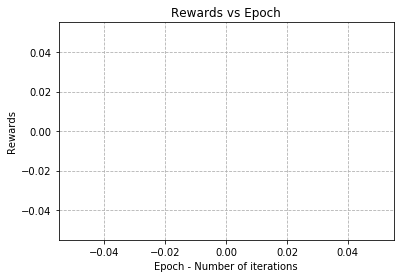



 Final state sequence
[(0, 1), (0, 2), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 2), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3), (1, 3)]
Final state-value sequence
{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0, (2, 3): 0, (3, 0): 0, (3, 1): 0, (3, 2): 0, (3, 3): 0}
Round Number: 1 Ends, Reward = -1, Round Reward = -15.0

 Final state sequence
[(0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0,

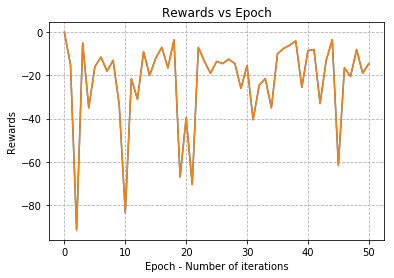

In [0]:
ag = Agent()
print(ag.render())
ag.play(50)
print(ag.render())

#### Output explanation - (Part 3.1):

Here, in the deterministic environment created in part 1, we implement Q-learning algorithm.

The values that we assume are as follows:

learning_rate = 0.3
exploration_rate = 0.1
gamma = 0.8
epoch (number of rounds) = 50

The outpt for total rewards we get is: -1136


### 3.2) For environment described in part 2 (Stochastic environment)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# global variables
number_of_rows = 4
number_of_columns = 4
goal_state = (3, 3)
dead_state = (1, 3)
initial_state = (0, 0)
unreachable_state = (1,1)
total_reward = 0
round_reward = 0
deterministic_env = False

In [0]:
# Environment Functions
class State:
  # Initialize the environment
  def __init__(self, state=initial_state):
    self.grid = np.zeros([number_of_rows, number_of_columns])
    self.reset(state)

  # Execute the given action
  def step(self, action, with_recursion = False):
    """
    action: up, down, left, right
    -------------
    0 | 1 | 2| 3|
    1 |
    2 |
    3 |
    return step
    """
    # deterministic
    if self.deterministic_env or with_recursion:
      if action == "up":
        nextState = (self.state[0] - 1, self.state[1])
      elif action == "down":
        nextState = (self.state[0] + 1, self.state[1])
      elif action == "left":
        nextState = (self.state[0], self.state[1] - 1)
      else:
        nextState = (self.state[0], self.state[1] + 1)
      self.determine = False
    # non-deterministic
    else:
      action = self.selectRandomAction(action)
      self.determine = True
      nextState = self.step(action, True)
    # if next state legal
    if (nextState[0] >= 0) and (nextState[0] <= 3):
      if (nextState[1] >= 0) and (nextState[1] <= 3):
        if nextState != unreachable_state:
          return nextState
    return self.state

  # Reset the environment attributes
  def reset(self, state=initial_state):
    self.grid[1, 1] = -2
    self.grid[3, 3] = 10
    self.grid[1, 3] = -1
    self.state = state
    self.terminate = False
    self.deterministic_env = deterministic_env

  # Display the environment
  def render(self):
    self.grid[self.state] = 1
    for i in range(0, number_of_rows):
      print('-----------------')
      out = '| '
      for j in range(0, number_of_columns):
        if self.grid[i, j] == 1:
          output_string = 'S'
        if self.grid[i, j] == 10:
          output_string = '*'
        if self.grid[i, j] == -2:
          output_string = '-'
        if self.grid[i, j] == -1:
          output_string = 'X'
        if self.grid[i, j] == 0:
          output_string = '0'
        out += output_string + ' | '
      print(out)
    print('-----------------')
    
  # Random action in case of stochastic environment
  def selectRandomAction(self, action):
    if action == "up":
      return np.random.choice(["up", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "down":
      return np.random.choice(["down", "left", "right"], p=[0.8, 0.1, 0.1])
    if action == "left":
      return np.random.choice(["left", "up", "down"], p=[0.8, 0.1, 0.1])
    if action == "right":
      return np.random.choice(["right", "up", "down"], p=[0.8, 0.1, 0.1])    

  # Rewards
  def giveReward(self):
    if self.state == goal_state:
      reward = 1
    elif self.state == dead_state:
      reward = -1
    else:
      reward = -0.5
    return reward

  # Terminal state check
  def isTerminalState(self):
    if (self.state == goal_state) or (self.state == dead_state):
      self.terminate = True

In [0]:
# Agent Functions
class Agent:

  # Initialize the agent attributes
  def __init__(self):
    self.states = []
    self.rewards_list = []
    self.rewards_list.append(0)
    self.actions = ["up", "down", "left", "right"]
    self.State = State()
    self.learning_rate = 0.3
    self.exploration_rate = 0.1
    self.gamma = 0.8
    self.round_reward = 0
    self.total_reward = 0
    # initial state reward
    self.state_values = {}
    for i in range(number_of_rows):
      for j in range(number_of_columns):
        self.state_values[(i, j)] = 0  # set initial value to 0
    self.reset()

  # choose action with most expected value
  def chooseAction(self):
    max_next_reward = 0
    action = ""

    # To decide if a random action needs to be taken for exploration
    if np.random.uniform(0, 1) <= self.exploration_rate:
      action = np.random.choice(self.actions)
    # greedy action
    else:
      for a in self.actions:
        next_reward = self.state_values[self.State.step(a)]
        if next_reward >= max_next_reward:
          action = a
          max_next_reward = next_reward
    return action

  # Execute the given action
  def step(self, action):
    position = self.State.step(action)
    return State(state=position)

  # Reset the attributes after an iteration
  def reset(self):
    self.states = []
    self.State = State()
    self.round_reward = 0

  # Execute the agent actions for 10 or given number of rounds
  def play(self, rounds=10):
    i = 0
    while i < rounds:
      # to the end of game back propagate reward
      if self.State.terminate:
        print('\n Final state sequence')
        print(self.states)
        # Print to test
        # print('Length = {}'.format(len(self.states)))
        print('Final state-value sequence')
        print(self.state_values)
        # back propagate
        reward = self.State.giveReward()
        self.round_reward += reward
        self.total_reward += reward
        # explicitly assign end state to reward values
        self.state_values[self.State.state] = reward  # this is optional
        print("Round Number: {} Ends, Reward = {}, Round Reward = {}".format(i+1, reward, self.round_reward))
        # self.rewards_list[i] = self.round_reward
        self.rewards_list.append(self.round_reward)
        
        for index,s in enumerate(self.states):
          current_q_value = self.state_values[s]
          if(index+1 != len(self.states)):
            next_q_value = self.state_values[self.states[index+1]]
          else:
            next_q_value = self.state_values[self.states[index]]
          reward = current_q_value + self.learning_rate * (reward + self.gamma*next_q_value - current_q_value)
          self.state_values[s] = round(reward, 3)
        self.reset()
        i += 1
      else:
        # Print to test
        # Print round number
        # print("Round Number: {} ".format(i+1))
        # choose the action with highest reward/ according to the exploration rate
        action = self.chooseAction()
        # append trace
        self.states.append(self.State.step(action))
        # Print to test
        # print("current position {} action {}".format(self.State.state, action))
        self.State = self.step(action) # by taking the action, it reaches the next state
        # mark is end
        self.State.isTerminalState()
        reward = self.State.giveReward()
        self.round_reward += reward
        self.total_reward += reward
        # Print to test
        # print("next state {}, Reward = {}".format(self.State.state, reward))
        # print("---------------------")

  # Display the grid
  def render(self):
    print("\n Total Reward = ",self.total_reward)
    for i in range(0, number_of_rows):
      # Print to test
      # print('----------------------------------')
      out = '| '
      for j in range(0, number_of_columns):
        out += str(self.state_values[(i, j)]).ljust(6) + ' | '
      print(out)
    # Print to test
    # print('----------------------------------')
    if(self.rewards_list != []):
      print('\n Rewards List')
      print(self.rewards_list)
      plt.plot(self.rewards_list)
      
      print('\n Rewards List Graph:')
      plt.plot(self.rewards_list)
      plt.title("Rewards vs Epoch")
      plt.xlabel('Epoch - Number of iterations')
      plt.ylabel('Rewards')
      plt.grid(ls='--')
      plt.show()
    return ""


 Total Reward =  0
| 0      | 0      | 0      | 0      | 
| 0      | 0      | 0      | 0      | 
| 0      | 0      | 0      | 0      | 
| 0      | 0      | 0      | 0      | 

 Rewards List
[0]

 Rewards List Graph:


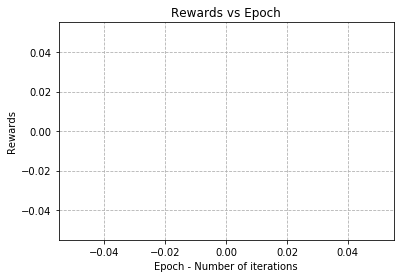



 Final state sequence
[(0, 1), (0, 2), (0, 2), (0, 3), (0, 3), (1, 3), (0, 3)]
Final state-value sequence
{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0, (2, 3): 0, (3, 0): 0, (3, 1): 0, (3, 2): 0, (3, 3): 0}
Round Number: 1 Ends, Reward = -1, Round Reward = -5.0

 Final state sequence
[(0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 1), (0, 1), (0, 1), (1, 0), (0, 0), (2, 1), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 1), (3, 0), (3, 1), (3, 2), (3, 2)]
Final state-value sequence
{(0, 0): 0, (0, 1): -0.3, (0, 2): -0.09, (0, 3): -0.504, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): -0.844, (2, 0): 0, (2, 1): 0, (2, 2): 0, (2, 3): 0, (3, 0): 0, (3, 1): 0, (3, 2): 0, (3, 3): 0}
Round Number: 2 Ends, Reward = 1, Round Reward = -12.5

 Final state sequence
[(0, 1), (0, 2), (0, 1), (1, 2), (2, 2), (2, 2), (1, 2), (1, 2), (0, 2), (1, 2), (2, 2), (1, 2), 

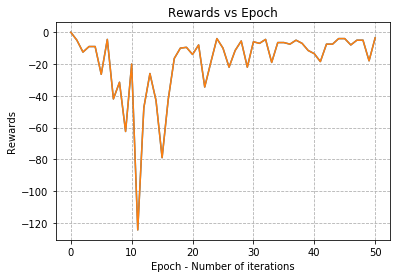

In [0]:
ag = Agent()
print(ag.render())
ag.play(50)
print(ag.render())

#### Output explanation - (Part 3.2):

Here, in the stochastic environment created in part 2, we implement Q-learning algorithm.

The values that we assume are as follows:

learning_rate = 0.3
exploration_rate = 0.1
gamma = 0.8
epoch (number of rounds) = 50

The stochastic probability for each action to execute = 0.8 and the probability for each of the other two actions selected is 0.1

For example, in this case, we have considered that if action 'right' is taken, the probability that action 'right' will be selected is 0.8, the probability that action 'up' will be selected is 0.1 and the probability that action 'down' will be selected is 0.1.

The outpt for total rewards we get is: -946.5
